# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
import json
import requests
from api_keys import weather_api_key
import numpy as np
from citipy import citipy
import random
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [2]:
city_list = []
lat_list = []
lng_list = []
for i in range(0,1500):
    lat = np.random.uniform(-90,90)
    lng = np.random.uniform(-180,180)
    city = citipy.nearest_city(lat,lng).city_name 
    if city not in city_list: 
        city_list.append(city)
        lat_list.append(lat)
        lng_list.append(lng)
    
print(len(city_list))
print(len(lat_list))
print(len(lng_list))

659
659
659


In [3]:
cities_df = pd.DataFrame({'Nearest City' : city_list, 'Latitude' : lat_list, 'Longitude': lng_list})
cities_df = cities_df.rename(columns={0:'Nearest City'})
cities_df

,Nearest City,Latitude,Longitude
0,sankheda,21.972025,73.779098
1,jamestown,-39.538875,-8.884986
2,cidreira,-53.676566,-27.616971
3,fairlie,-44.337486,170.244063
4,estevan,48.946029,-102.682740
...,...,...,...
654,vaikam,9.747670,76.353942
655,san isidro,6.161389,129.789512
656,paamiut,60.559438,-51.687735
657,chipinge,-21.206469,32.930337


In [4]:
cities_df

,Nearest City,Latitude,Longitude
0,sankheda,21.972025,73.779098
1,jamestown,-39.538875,-8.884986
2,cidreira,-53.676566,-27.616971
3,fairlie,-44.337486,170.244063
4,estevan,48.946029,-102.682740
...,...,...,...
654,vaikam,9.747670,76.353942
655,san isidro,6.161389,129.789512
656,paamiut,60.559438,-51.687735
657,chipinge,-21.206469,32.930337


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

units = 'imperial'

cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

for index, row in cities_df.iterrows():
    query_url = f"{url}{row['Nearest City']}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()
    
    try:
        cities_df.loc[index, 'Temperature (F)'] = response['main']['temp']
        cities_df.loc[index, 'Humidity (%)'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
    except (KeyError, IndexError):
        print(f"Missing City records for {index} : {row['Nearest City']} ... skipping.")
  

Missing City records for 11 : barawe ... skipping.
Missing City records for 35 : belushya guba ... skipping.
Missing City records for 58 : barentsburg ... skipping.
Missing City records for 68 : amderma ... skipping.
Missing City records for 76 : taolanaro ... skipping.
Missing City records for 85 : rawannawi ... skipping.
Missing City records for 94 : illoqqortoormiut ... skipping.
Missing City records for 121 : vaitupu ... skipping.
Missing City records for 141 : lolua ... skipping.
Missing City records for 142 : tsihombe ... skipping.
Missing City records for 146 : toliary ... skipping.
Missing City records for 147 : samusu ... skipping.
Missing City records for 151 : qabis ... skipping.
Missing City records for 158 : attawapiskat ... skipping.
Missing City records for 179 : gurgan ... skipping.
Missing City records for 194 : tunduru ... skipping.
Missing City records for 198 : wahran ... skipping.
Missing City records for 213 : saleaula ... skipping.
Missing City records for 223 : 

In [6]:
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,sankheda,21.972025,73.779098,87.8,53,100,9.44
1,jamestown,-39.538875,-8.884986,80.26,47,20,13.8
2,cidreira,-53.676566,-27.616971,58.48,66,0,9.78
3,fairlie,-44.337486,170.244063,46.56,89,56,4.34
4,estevan,48.946029,-102.682740,48.33,81,90,25.32
...,...,...,...,...,...,...,...
654,vaikam,9.747670,76.353942,77.02,89,100,5.73
655,san isidro,6.161389,129.789512,63.09,90,90,1.01
656,paamiut,60.559438,-51.687735,35.2,70,78,8.25
657,chipinge,-21.206469,32.930337,48.7,64,0,2.55


In [7]:
cities_df['Temperature (F)'] = cities_df['Temperature (F)'].replace("", np.nan)
cities_df = cities_df.dropna(axis=0, subset=['Temperature (F)'])
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,sankheda,21.972025,73.779098,87.80,53,100,9.44
1,jamestown,-39.538875,-8.884986,80.26,47,20,13.8
2,cidreira,-53.676566,-27.616971,58.48,66,0,9.78
3,fairlie,-44.337486,170.244063,46.56,89,56,4.34
4,estevan,48.946029,-102.682740,48.33,81,90,25.32
...,...,...,...,...,...,...,...
654,vaikam,9.747670,76.353942,77.02,89,100,5.73
655,san isidro,6.161389,129.789512,63.09,90,90,1.01
656,paamiut,60.559438,-51.687735,35.20,70,78,8.25
657,chipinge,-21.206469,32.930337,48.70,64,0,2.55


In [8]:
cities_df = cities_df.reset_index(drop=True)
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,sankheda,21.972025,73.779098,87.80,53,100,9.44
1,jamestown,-39.538875,-8.884986,80.26,47,20,13.8
2,cidreira,-53.676566,-27.616971,58.48,66,0,9.78
3,fairlie,-44.337486,170.244063,46.56,89,56,4.34
4,estevan,48.946029,-102.682740,48.33,81,90,25.32
...,...,...,...,...,...,...,...
596,vaikam,9.747670,76.353942,77.02,89,100,5.73
597,san isidro,6.161389,129.789512,63.09,90,90,1.01
598,paamiut,60.559438,-51.687735,35.20,70,78,8.25
599,chipinge,-21.206469,32.930337,48.70,64,0,2.55


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
cities_df.to_csv('Cities_Weather_Data.csv')

In [10]:
cities_df.dtypes

Nearest City         object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)         object
Cloudiness (%)       object
Wind Speed (mph)     object
dtype: object

In [11]:
cities_df['Humidity (%)'] = cities_df['Humidity (%)'].astype(float)
cities_df['Cloudiness (%)'] = cities_df['Cloudiness (%)'].astype(float)
cities_df['Wind Speed (mph)'] = cities_df['Wind Speed (mph)'].astype(float)
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,sankheda,21.972025,73.779098,87.80,53.0,100.0,9.44
1,jamestown,-39.538875,-8.884986,80.26,47.0,20.0,13.80
2,cidreira,-53.676566,-27.616971,58.48,66.0,0.0,9.78
3,fairlie,-44.337486,170.244063,46.56,89.0,56.0,4.34
4,estevan,48.946029,-102.682740,48.33,81.0,90.0,25.32
...,...,...,...,...,...,...,...
596,vaikam,9.747670,76.353942,77.02,89.0,100.0,5.73
597,san isidro,6.161389,129.789512,63.09,90.0,90.0,1.01
598,paamiut,60.559438,-51.687735,35.20,70.0,78.0,8.25
599,chipinge,-21.206469,32.930337,48.70,64.0,0.0,2.55


In [12]:
cities_df.dtypes

Nearest City         object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
cities_df[cities_df['Humidity (%)']>100]

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [14]:
#  Get the indices of cities that have humidity over 100%.


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

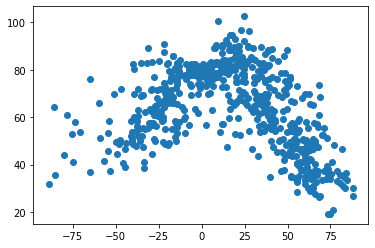

In [16]:
plt.scatter(cities_df['Latitude'], cities_df['Temperature (F)'])
plt.show()

Analysis - The Temperatures increase as the latitude moves from latitudes -90 to 0 and from 90 to 0, 0 being the equator, -90 being southpole and 90 being northpole.

## Latitude vs. Humidity Plot

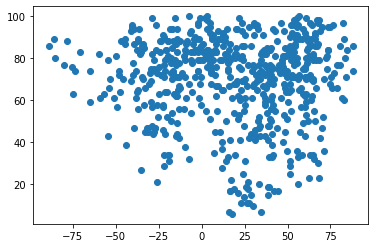

In [17]:
plt.scatter(cities_df['Latitude'], cities_df['Humidity (%)'])

Analysis - 

## Latitude vs. Cloudiness Plot

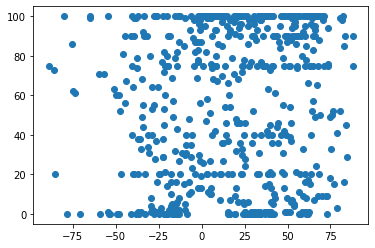

In [18]:
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness (%)'])

Analysis - 

## Latitude vs. Wind Speed Plot

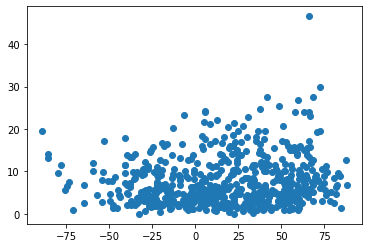

In [19]:
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed (mph)'])

Analysis - 

## Linear Regression

In [20]:
Northern_df = cities_df[cities_df['Latitude']>0]
Northern_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,sankheda,21.972025,73.779098,87.80,53.0,100.0,9.44
4,estevan,48.946029,-102.682740,48.33,81.0,90.0,25.32
5,provideniya,57.565470,-170.780972,46.51,57.0,0.0,15.66
6,katsuura,26.834490,145.466467,68.20,77.0,95.0,13.87
7,pasighat,30.221908,95.905156,74.46,91.0,90.0,3.87
...,...,...,...,...,...,...,...
595,mata,21.280135,111.574424,59.59,51.0,100.0,4.25
596,vaikam,9.747670,76.353942,77.02,89.0,100.0,5.73
597,san isidro,6.161389,129.789512,63.09,90.0,90.0,1.01
598,paamiut,60.559438,-51.687735,35.20,70.0,78.0,8.25


In [21]:
Southern_df = cities_df[cities_df['Latitude']<0]
Southern_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
1,jamestown,-39.538875,-8.884986,80.26,47.0,20.0,13.80
2,cidreira,-53.676566,-27.616971,58.48,66.0,0.0,9.78
3,fairlie,-44.337486,170.244063,46.56,89.0,56.0,4.34
8,rikitea,-27.527914,-123.261294,76.95,79.0,55.0,11.27
10,hermanus,-73.572679,-3.695595,57.90,74.0,61.0,7.52
...,...,...,...,...,...,...,...
576,monte alegre,-2.272013,-54.107597,81.73,74.0,83.0,3.00
578,lithgow,-33.903722,149.897118,47.52,86.0,44.0,9.93
584,charagua,-19.851985,-62.042943,71.17,64.0,14.0,1.88
585,jaguaruna,-29.466296,-48.566534,57.36,69.0,4.0,0.78


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

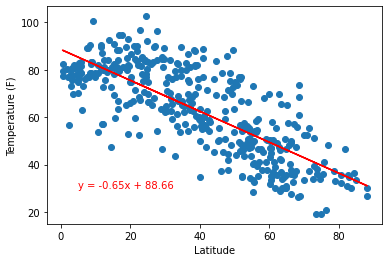

In [22]:
x = Northern_df['Latitude']
y = Northern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(5,30),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

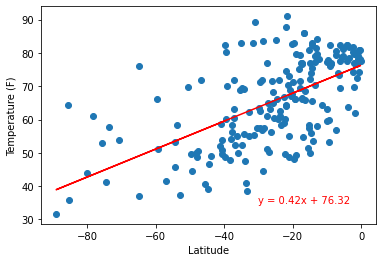

In [23]:
x = Southern_df['Latitude']
y = Southern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-30,35),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

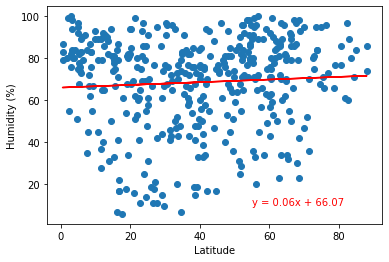

In [24]:
x = Northern_df['Latitude']
y = Northern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(55,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

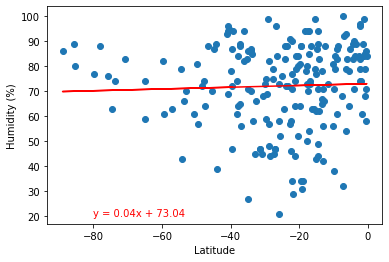

In [25]:
x = Southern_df['Latitude']
y = Southern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-80,20),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

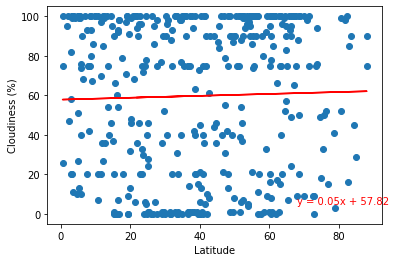

In [26]:
x = Northern_df['Latitude']
y = Northern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(68,5),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

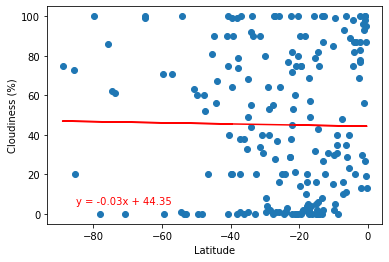

In [27]:
x = Southern_df['Latitude']
y = Southern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-85,5),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

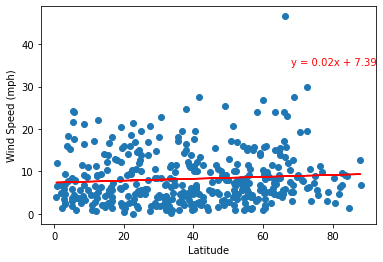

In [28]:
x = Northern_df['Latitude']
y = Northern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(68,35),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

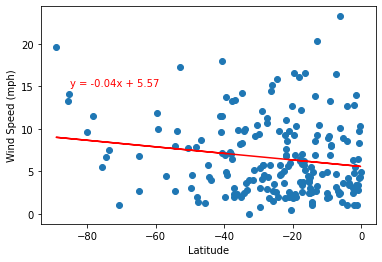

In [29]:
x = Southern_df['Latitude']
y = Southern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-85,15),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()